1. try to estimate the mu of a univariate gaussian assuming known variance=1  using maximum likelihood.
2. sample data from N(0, 1)
3. derive the maximum likelihood and estimate mu
4. calculate fisher information
5. visualize and interpret it as the expectation of the second derivative of the log-likelihood
6. visualize and interpret it as the variance of the first derivative of the log-likelihood
7. repeat the experiment for logistic regression.

The likelihood is

\begin{align}
L
= p(x, \mu) 
= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left [- \frac{1}{2 \sigma^2} (x - \mu)^2 \right ] \\ 
\end{align}


Ignoring the constant, the log-likelihood and its 1st and 2nd derivatives are in the forms of 

\begin{align*}
\ell
= c - \frac{1}{2\sigma^2}(x - \mu)^2 \\
\frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2}(x - \mu) \\
- \frac{\partial^2 \ell}{\partial \mu^2} = \frac{1}{\sigma^2} \\
\end{align*}

Then, Fisher's information is

\begin{align*}
\mathcal{I}(\mu)
&= \mathbb{E}\left[ \left( \frac{\partial \ell}{\partial \mu} \right)^2 \right ] \\
&= \frac{1}{\sigma^4} \mathbb{E}[(x - \mu)^2] \\
&= \frac{1}{\sigma^2}
\end{align*}

Equivalently,

\begin{align*}
\mathcal{I}(\mu)
&= \mathbb{E}\left[ \frac{\partial^2 \ell}{\partial \mu^2} \right ] \\
&= \frac{1}{\sigma^2}
\end{align*}


So the Fisher information of $\mu$ of a Gaussian distribution with known variance is just the inverse of the variance, aka. precision.

For Fisher information of multivariate Gaussian with known covariance matrix, see **Multivariate Normal Mean** section of https://www2.stat.duke.edu/courses/Spring16/sta532/lec/fish.pdf.

# Intuition to the defintion of FIsher information in the form of variance of the first derivative, which happens to be equivalent to the expectation of the second derivative.

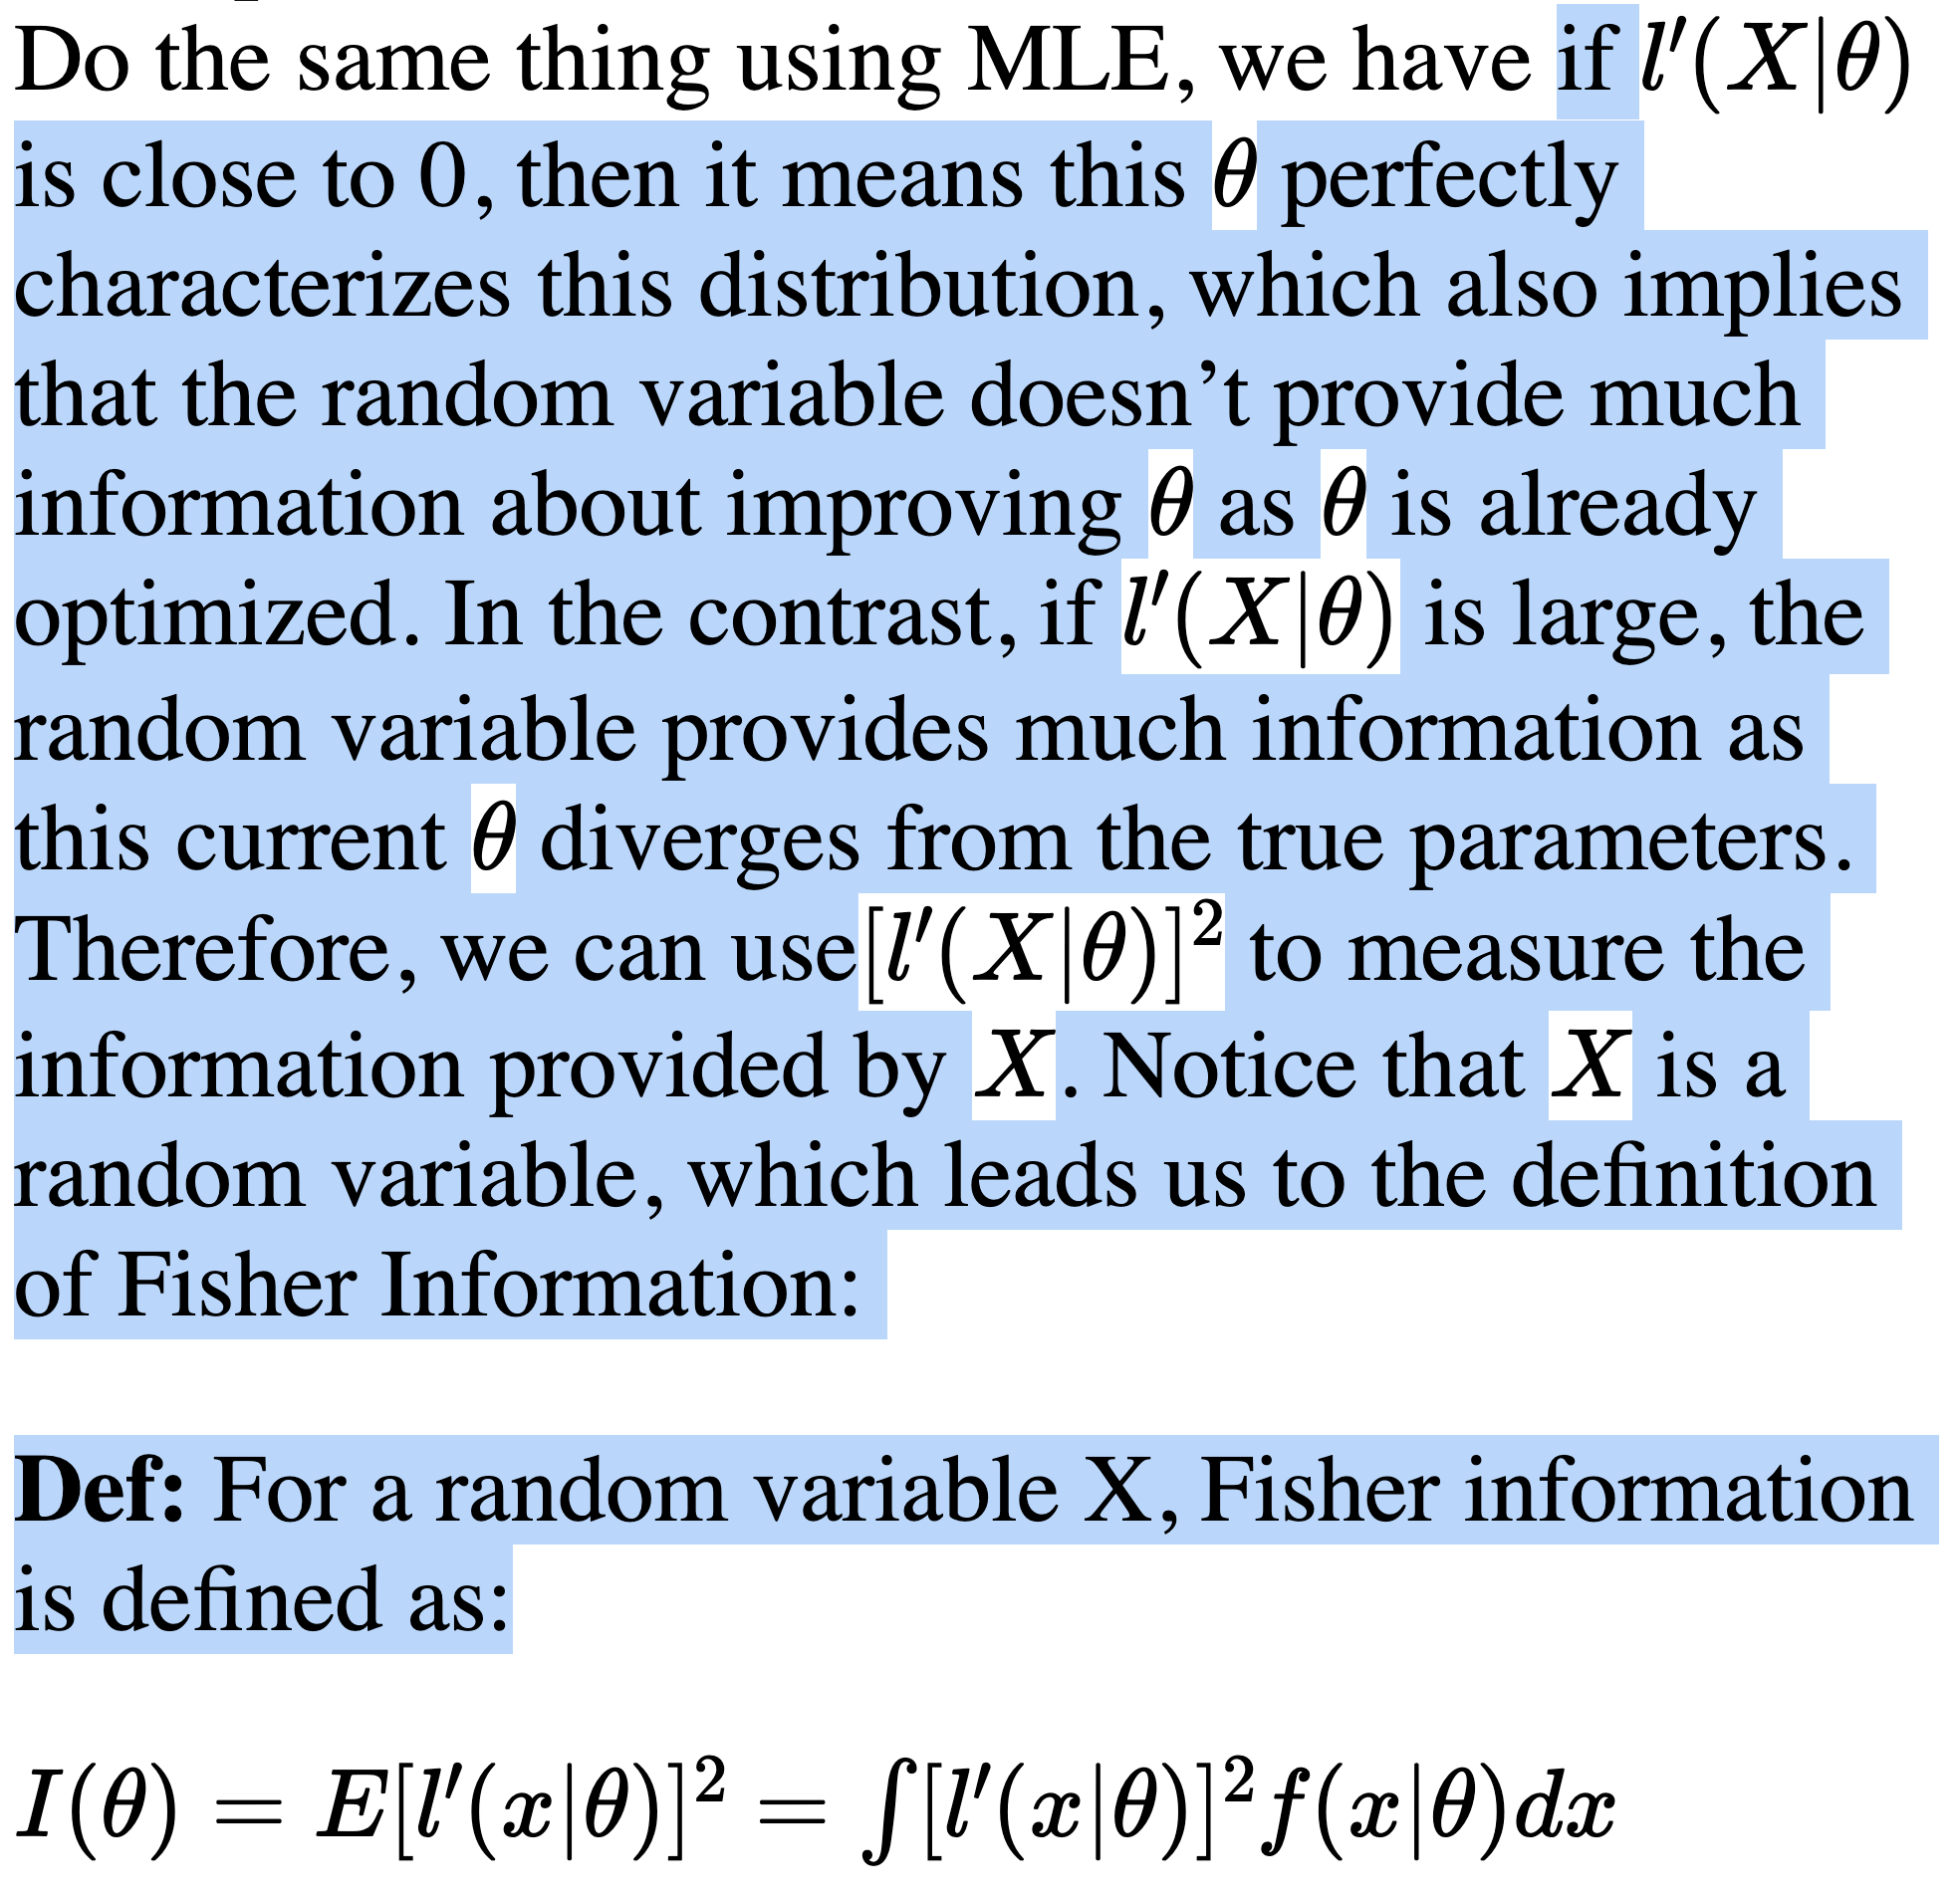

https://wp.nyu.edu/kexinhuang/2018/08/16/fisher/

# Demo

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from numpy.random import default_rng

In [3]:
rng = default_rng()

True distribution where the data are sampled from.

In [4]:
μ_true = 77.7
σ = 0.3

In [5]:
xs = rng.normal(loc=μ_true, scale=σ, size=100000)

log-likelihood without the constant term ($c$)

In [6]:
def log_likelihood(x_, mu):
    return - 1 / (2 * σ ** 2) * (x_ - mu) ** 2

In [7]:
def first_derivative(x_, mu, sigma=σ):
    return 1 / sigma ** 2 * (x_ - mu)

Text(0, 0.5, 'log_likelihood(x_i; μ)')

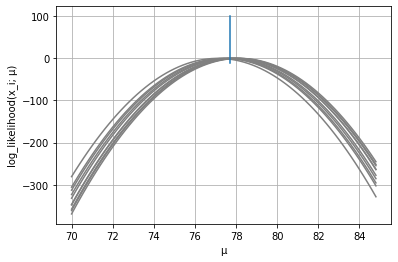

In [8]:
μs = np.arange(70, 85, 0.2)
for x in rng.normal(loc=μ_true, scale=σ, size=10):
    plt.plot(μs, log_likelihood(x, μs), color="grey")
plt.plot([μ_true, μ_true], [-10, 100], label="true μ")
plt.grid()
plt.xlabel("μ")
plt.ylabel("log_likelihood(x_i; μ)")

(-30.0, 30.0)

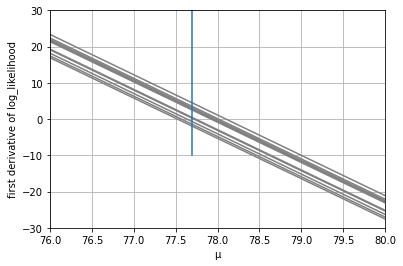

In [9]:
μs = np.arange(70, 85)
for x in rng.normal(loc=μ_true, scale=σ, size=10):
    plt.plot(μs, first_derivative(x, μs), color="grey")
plt.plot([μ_true, μ_true], [-10, 100], label="true μ")
plt.grid()
plt.xlabel("μ")
plt.ylabel("first derivative of log_likelihood")
plt.xlim(76, 80)
plt.ylim(-30, 30)

In [12]:
log_likelihoods =  -1 / (2 * σ ** 2) * (xs - μ_true) ** 2

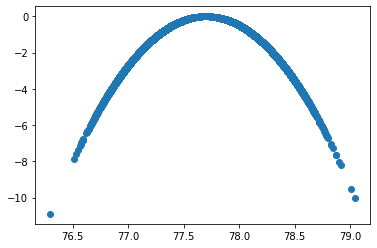

In [13]:
plt.scatter(xs, log_likelihoods)

Distribution of first derivatives:

In [14]:
d1s = 1 / σ ** 2 * (xs - μ_true)

Text(0.5, 0, 'distribution of first derivatives.')

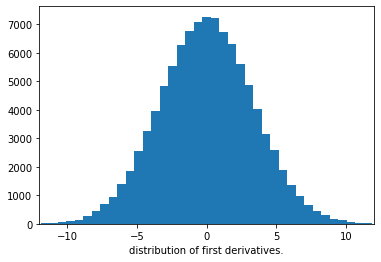

In [15]:
_ = plt.hist(d1s, bins=50)
plt.xlim(-12, 12)
plt.xlabel('distribution of first derivatives.')

In [82]:
np.var(d1s, ddof=1)

11.009965852434359

Second derivatives:

In [71]:
1 / σ ** 2

0.1111111111111111